## Import necessary libaries

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import os
for dirname, _, filenames in os.walk('test.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import os

# Start walking from the current directory (".")
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
train_df = pd.read_csv('train.csv',on_bad_lines='skip')

In [9]:
train_df = pd.read_csv('train.csv', on_bad_lines='skip')
y_train = train_df['Dominant_Emotion']


In [10]:
x_train = train_df.drop(columns=['Dominant_Emotion', 'Gender', 'Platform', 'User_ID'])


In [11]:
gender_df = pd.get_dummies(train_df['Gender'], prefix='Gender', drop_first=True)
platform_df = pd.get_dummies(train_df['Platform'], prefix='Platform', drop_first=True)


In [12]:
x_train = pd.concat([x_train, gender_df, platform_df], axis=1)


In [13]:
print(x_train.dtypes)


Age                            object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Gender_22                        bool
Gender_23                        bool
Gender_24                        bool
Gender_25                        bool
Gender_26                        bool
Gender_27                        bool
Gender_28                        bool
Gender_29                        bool
Gender_30                        bool
Gender_31                        bool
Gender_32                        bool
Gender_33                        bool
Gender_34                        bool
Gender_35                        bool
Gender_Female                    bool
Gender_Male                      bool
Gender_Non-binary                bool
Platform_Instagram               bool
Platform_LinkedIn                bool
Platform_Snapchat                bool
Platform_Tel

## Check unique values in the 'Gender' column

In [15]:
# Check unique values in the 'Gender' column
print(train_df['Gender'].unique())

# Check unique values in the 'Platform' column
print(train_df['Platform'].unique())


[nan 'Female' 'Male' 'Non-binary' '27' '24' '29' '33' '31' '22' '25' '28'
 '30' '23' '34' '26' '35' '21' '32']
[nan 'Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


## 1. Combine numerical and encoded categorical variables
## 2. Scaling the data
## 3. Split the data into training and testing sets

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read the CSV file and handle bad lines by skipping them
train_df = pd.read_csv('train.csv', on_bad_lines='skip')

# Drop rows with missing values in 'Gender' column
train_df = train_df.dropna(subset=['Gender'])

# Drop rows with unexpected values in 'Gender' column
train_df = train_df[~train_df['Gender'].str.isdigit()]

# Replace unexpected values in 'Platform' column with a placeholder value
train_df['Platform'] = train_df['Platform'].replace(['27', '24', '29', '33', '31', '22', '25', '28', '30', '23', '34', '26', '35', '21', '32'], 'Unknown')

# Extract the target variable
y_train = train_df['Dominant_Emotion']

# Handle categorical variables using get_dummies
gender_df = pd.get_dummies(train_df['Gender'], prefix='Gender', drop_first=True)
platform_df = pd.get_dummies(train_df['Platform'], prefix='Platform', drop_first=True)

# Combine numerical and encoded categorical variables
x_train = pd.concat([train_df.drop(columns=['Dominant_Emotion', 'Gender', 'Platform', 'User_ID']), gender_df, platform_df], axis=1)

# Scaling the data
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# Print the columns to verify
print(x_train_scaled.columns)

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=1)

# Print information about the training set
print(train_x.info())


Index(['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Gender_Male', 'Gender_Non-binary',
       'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat',
       'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 577 to 37
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         739 non-null    float64
 1   Daily_Usage_Time (minutes)  739 non-null    float64
 2   Posts_Per_Day               739 non-null    float64
 3   Likes_Received_Per_Day      739 non-null    float64
 4   Comments_Received_Per_Day   739 non-null    float64
 5   Messages_Sent_Per_Day       739 non-null    float64
 6   Gender_Male                 739 non-null    float64
 7   Gender_Non-binary          

## Scaling using standardScaler

In [17]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)


In [18]:
train_x, test_x, train_y, test_y = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=1)

In [19]:
print(train_x.info())

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 577 to 37
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         739 non-null    float64
 1   Daily_Usage_Time (minutes)  739 non-null    float64
 2   Posts_Per_Day               739 non-null    float64
 3   Likes_Received_Per_Day      739 non-null    float64
 4   Comments_Received_Per_Day   739 non-null    float64
 5   Messages_Sent_Per_Day       739 non-null    float64
 6   Gender_Male                 739 non-null    float64
 7   Gender_Non-binary           739 non-null    float64
 8   Platform_Instagram          739 non-null    float64
 9   Platform_LinkedIn           739 non-null    float64
 10  Platform_Snapchat           739 non-null    float64
 11  Platform_Telegram           739 non-null    float64
 12  Platform_Twitter            739 non-null    float64
 13  Platform_Whatsapp           739 non-nul

In [20]:
train_x, test_x, train_y, test_y = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=1)


## training a model 

70.8108108108108


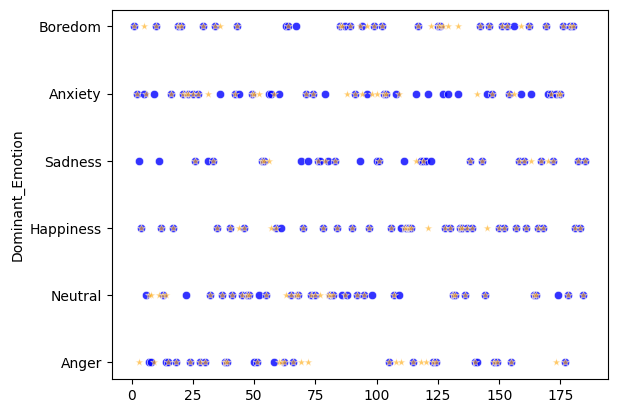

In [21]:
# training a model 
scorelist = []
namelist = []
#using SVM Model 
svm =SVC(random_state=1)
svm.fit(train_x,train_y)

score = svm.score(test_x,test_y)*100
scorelist.append (score)

namelist.append ("svm")
print(score)
#Visulising Result
x=np.arange(1,len(test_y)+1)
sns.scatterplot(x=x,y=test_y,color = 'blue' ,data=None , alpha = 0.8)
sns.scatterplot(x=x,y=svm.predict(test_x),data=None , color = 'orange',alpha = 0.6,marker = '*')
plt.show()

## using K Nearest Neighbour 

49.72972972972973


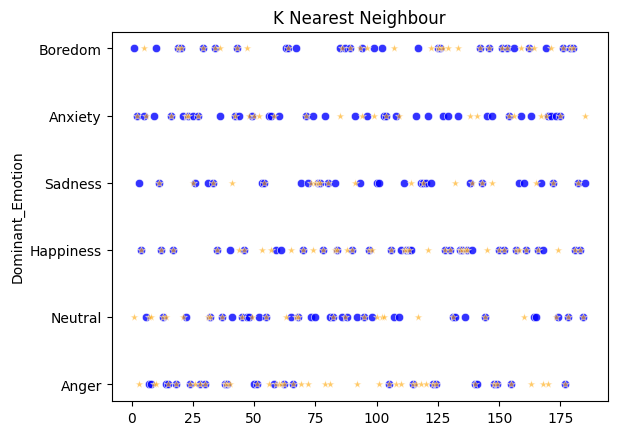

In [22]:
# using K Nearest Neighbour 

n= math.sqrt(len(train_x))
n= math.floor(n)
if(n%2==0 ):
    n=n+1

knn= KNeighborsClassifier(n_neighbors=n)

knn.fit(train_x,train_y)


score = knn.score(test_x,test_y)*100
scorelist.append (score)

namelist.append ("knn")

print(score)
#Visulising Result Accuracy
x=np.arange(1,len(test_y)+1)
sns.scatterplot(x=x,y=test_y,color = 'blue' , alpha = 0.8)
sns.scatterplot(x=x,y=knn.predict(test_x),color = 'orange',alpha = 0.6,marker = '*')
plt.title("K Nearest Neighbour")
plt.show()

## using K Nearest Neighbour 

55.67567567567567


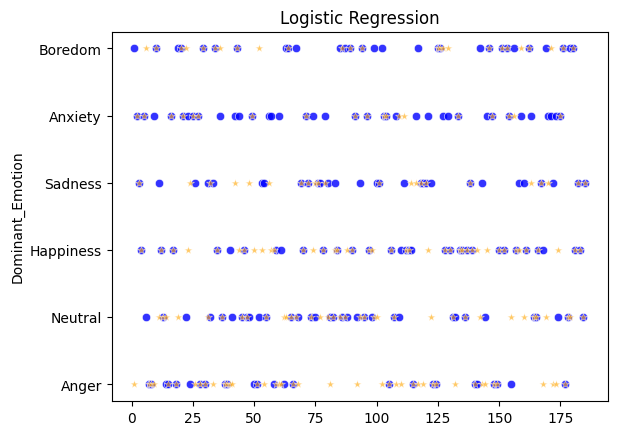

In [23]:
# using K Nearest Neighbour 
log = LogisticRegression(random_state=1)
log.fit(train_x,train_y)

score = log.score(test_x,test_y)*100
scorelist.append (score)
print(score)

namelist.append ("log")
#Visualising the accuracy
x=np.arange(1,len(test_y)+1)
sns.scatterplot(x=x,y=test_y,color = 'blue' , alpha = 0.8)
sns.scatterplot(x=x,y=log.predict(test_x),color = 'orange',alpha = 0.6,marker = '*')
plt.title("Logistic Regression")
plt.show()

## using Naive Bayes

41.08108108108108


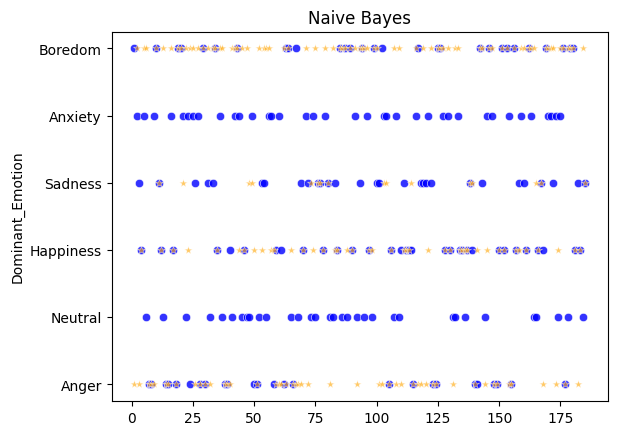

In [24]:
#using Naive Bayes

nb = GaussianNB()
nb.fit(train_x,train_y)

score = nb.score(test_x,test_y)*100
scorelist.append (score)

namelist.append ("NB")
print(score)
#Visulising Result Accuracy
x=np.arange(1,len(test_y)+1)
sns.scatterplot(x=x,y=test_y,color = 'blue' , alpha = 0.8)
sns.scatterplot(x=x,y=nb.predict(test_x),color = 'orange',alpha = 0.6,marker = '*')
plt.title("Naive Bayes")
plt.show()

##  Using Decision Tree Classifier 

94.05405405405406


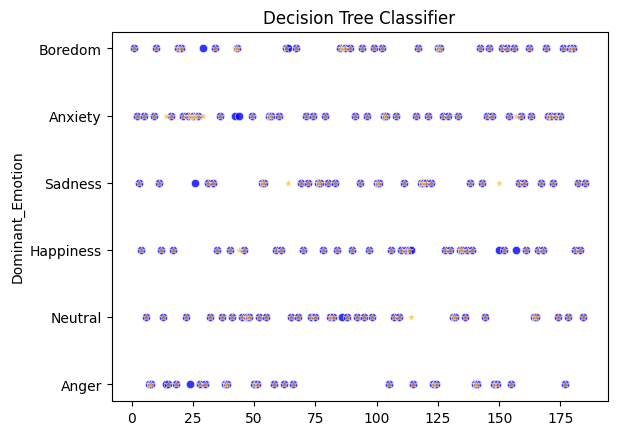

In [25]:
# using Decision Tree Classifier 

tree = DecisionTreeClassifier(random_state=1)

tree.fit(train_x,train_y)

score = tree.score(test_x,test_y)*100
scorelist.append (score)

namelist.append ("DecTree")
print(score)
#Visulising Result Accuracy 
x=np.arange(1,len(test_y)+1)
sns.scatterplot(x=x,y=test_y,color = 'blue' , alpha = 0.8)
sns.scatterplot(x=x,y=tree.predict(test_x),color = 'orange',alpha = 0.6,marker = '*')
plt.title("Decision Tree Classifier")
plt.show()

In [ ]:
pip install scikit-learn


In [ ]:
pip install pmdarima


## Pattern Matching

In [1]:
# Import necessary libraries
import pandas as pd
import re

# Load the CSV file into a DataFrame
df = pd.read_csv('test.csv')

# Define a function for pattern matching
def match_pattern(text, pattern):
    return bool(re.search(pattern, text))

# Define the pattern to match
pattern = 'happy|joy|excited'  # Example pattern for dominant emotions

# Apply the pattern matching function to the 'Dominant_Emotion' column
df['Emotion_Match'] = df['Dominant_Emotion'].apply(lambda x: match_pattern(str(x), pattern))

# Print the DataFrame with the new column
print(df)


     User_ID  Age      Gender  Platform  Daily_Usage_Time (minutes)  \
0        NaN  NaN         NaN       NaN                         NaN   
1      500.0   27      Female  Snapchat                       120.0   
2        NaN  NaN         NaN       NaN                         NaN   
3      488.0   21  Non-binary  Snapchat                        60.0   
4        NaN  NaN         NaN       NaN                         NaN   
..       ...  ...         ...       ...                         ...   
201    708.0   24  Non-binary  Facebook                       110.0   
202      NaN  NaN         NaN       NaN                         NaN   
203    993.0   24        Male  Telegram                        75.0   
204      NaN  NaN         NaN       NaN                         NaN   
205     60.0   27        Male  Facebook                        60.0   

     Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0              NaN                     NaN                        NaN   
1

In [ ]:
pip install Dash

In [ ]:
pip install Dash

## Comarision Decision Tree,KNN,Regresion Model

In [1]:
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, neighbors
import plotly.graph_objects as go
import pandas as pd
import numpy as np

app = Dash(__name__)

models = {
    'Regression': linear_model.LinearRegression,
    'Decision Tree': tree.DecisionTreeRegressor,
    'k-NN': neighbors.KNeighborsRegressor
}

app.layout = html.Div([
    html.H4("Predicting Social Media Effect"),
    html.P("Select model:"),
    dcc.Dropdown(
        id='dropdown',
        options=[{'label': model, 'value': model} for model in models],
        value='Decision Tree',
        clearable=False
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    Input('dropdown', "value"))
def train_and_display(name):
    # Load the data from CSV file
    df = pd.read_csv('test.csv')
    
    # Use relevant columns for the model
    X = df[['Daily_Usage_Time (minutes)']].values
    y = df['Likes_Received_Per_Day'].values
    
    # Remove rows with NaN values in X or y
    mask = ~np.isnan(X).squeeze() & ~np.isnan(y)
    X = X[mask].reshape(-1, 1)
    y = y[mask]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    model = models[name]()
    model.fit(X_train, y_train)

    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range = model.predict(x_range)

    fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train, 
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test, 
                   name='test', mode='markers'),
        go.Scatter(x=x_range.squeeze(), y=y_range, 
                   name='prediction', mode='lines')
    ])
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


## pattern matching algorithm in Python using a machine learning classifier

In [1]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


## Emotion Prediction from Social Media Patterns

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Sample data
data = {
    'User_ID': [500, 488, 776, 869, 573, 428, 528, 773, 382, 505, 20],
    'Age': [27, 21, 28, 27, 21, 25, 25, 21, 24, 33, 32],
    'Gender': ['Female', 'Non-binary', 'Non-binary', 'Male', 'Non-binary', 'Female', 'Female', 'Non-binary', 'Non-binary', 'Male', 'Female'],
    'Platform': ['Snapchat', 'Snapchat', 'Snapchat', 'Telegram', 'Facebook', 'Instagram', 'Instagram', 'Facebook', 'Snapchat', 'LinkedIn', 'Instagram'],
    'Daily_Usage_Time (minutes)': [120, 60, 115, 105, 55, 160, 160, 55, 85, 45, 140],
    'Posts_Per_Day': [4, 1, 3, 3, 3, 6, 6, 3, 3, 1, 5],
    'Likes_Received_Per_Day': [40, 18, 38, 48, 17, 85, 85, 17, 33, 10, 70],
    'Comments_Received_Per_Day': [18, 7, 18, 20, 7, 26, 26, 7, 20, 5, 22],
    'Messages_Sent_Per_Day': [22, 12, 27, 28, 12, 30, 30, 12, 18, 12, 33],
    'Dominant_Emotion': ['Neutral', 'Neutral', 'Anxiety', 'Anxiety', 'Neutral', 'Happiness', 'Happiness', 'Neutral', 'Happiness', 'Boredom', 'Happiness']
}

# Convert the sample data to a DataFrame
df = pd.DataFrame(data)

# Prepare the features and labels
X = df[['Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)', 
        'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 
        'Messages_Sent_Per_Day']]
y = df['Dominant_Emotion']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.33
              precision    recall  f1-score   support

     Boredom       1.00      0.00      0.00         1
   Happiness       0.50      1.00      0.67         1
     Neutral       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.50      0.33      0.22         3
weighted avg       0.50      0.33      0.22         3



## Examining the Impact of Different Platforms on Users' Emotions 

** 1. Facebook: High in neutral and anxiety; moderate boredom and sadness.**
** 2. Instagram: High happiness; moderate anxiety, neutral, and sadness; low anger.**
** 3. LinkedIn: High boredom; moderate neutral and anxiety; low sadness and anger.**
** 4. Snapchat: High anxiety; moderate neutral and happiness.**
** 5. Telegram: High neutral and sadness; moderate anger and anxiety.**
** 6. Twitter: High anger and sadness; moderate neutral and anxiety; low happiness.**
** 7. WhatsApp: High anger; moderate neutral and anxiety; low happiness.**